<a href="https://colab.research.google.com/github/rehann888/Natural-Language-Processing/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd

import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import FastText
from tqdm.auto import tqdm

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.utils import save_model, load_model

In [87]:
from string import punctuation

In [88]:
df = pd.read_csv("review.tsv", sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [89]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [90]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [91]:
sentence = [word_tokenize(Review.lower())for Review in tqdm(df.Review)]
sentence[:5]

  0%|          | 0/1000 [00:00<?, ?it/s]

[['wow', '...', 'loved', 'this', 'place', '.'],
 ['crust', 'is', 'not', 'good', '.'],
 ['not', 'tasty', 'and', 'the', 'texture', 'was', 'just', 'nasty', '.'],
 ['stopped',
  'by',
  'during',
  'the',
  'late',
  'may',
  'bank',
  'holiday',
  'off',
  'rick',
  'steve',
  'recommendation',
  'and',
  'loved',
  'it',
  '.'],
 ['the',
  'selection',
  'on',
  'the',
  'menu',
  'was',
  'great',
  'and',
  'so',
  'were',
  'the',
  'prices',
  '.']]

In [92]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [93]:
sw_english = stopwords.words("english")+list(punctuation)

TRAIN MODEL

In [94]:
model = FastText(sentence, vector_size=100, window = 5, min_count=5, workers=3, epochs= 1000, sg=0, hs=0)

In [95]:
os.makedirs("model/fasttext/", exist_ok = True)

In [96]:
model.save("model/fasttext/review.fasttext")

LOAD MODEL

In [97]:
model = FastText.load("model/fasttext/review.fasttext")

CONTINUE TRAINING

In [98]:
text = "the room is clean, and the waiter is quite friendly"

In [99]:
ex = word_tokenize(text)
ex

['the',
 'room',
 'is',
 'clean',
 ',',
 'and',
 'the',
 'waiter',
 'is',
 'quite',
 'friendly']

In [100]:
ex_data = [ 'the','room','is','clean',',','and','the','waiter','is','quite','friendly']

In [101]:
model.train(ex_data, total_examples = len (ex_data), epochs=1)

(2, 42)

In [102]:
model.save("model/fasttext/review.fasttext")

In [103]:
fasttext = model.wv

In [104]:
fasttext.index_to_key

['.',
 'the',
 'and',
 ',',
 'i',
 'was',
 '!',
 'a',
 'to',
 'is',
 'it',
 'this',
 'of',
 'food',
 'not',
 'for',
 'in',
 'place',
 "n't",
 'good',
 'we',
 'service',
 'very',
 'my',
 'with',
 'had',
 'great',
 'that',
 'be',
 'so',
 'you',
 'are',
 'were',
 'have',
 'but',
 'back',
 'they',
 'here',
 'at',
 'on',
 'like',
 'all',
 'go',
 'time',
 'our',
 "'s",
 'do',
 'will',
 'there',
 'really',
 'as',
 'did',
 'just',
 'an',
 'would',
 'their',
 'best',
 'if',
 '...',
 'ever',
 'also',
 'friendly',
 'only',
 'never',
 'one',
 'up',
 'restaurant',
 'no',
 'your',
 'nice',
 'out',
 'from',
 'amazing',
 'again',
 'what',
 "'ve",
 'been',
 'delicious',
 'vegas',
 'which',
 '-',
 'by',
 'came',
 'me',
 'some',
 "'m",
 'experience',
 'when',
 'pretty',
 'minutes',
 'love',
 'he',
 'could',
 'get',
 'staff',
 'us',
 'eat',
 'disappointed',
 'or',
 'wo',
 'definitely',
 'even',
 ')',
 'much',
 'got',
 'bad',
 'going',
 'made',
 'first',
 'chicken',
 'about',
 'can',
 'more',
 '(',
 'has',

In [105]:
fasttext.vector_size

100

In [106]:
fasttext["you"]

array([ 1.6750003 ,  1.2348789 , -2.2004802 ,  1.5113909 , -2.1299841 ,
       -0.49002632, -1.0284618 ,  0.07292441, -0.34605223,  1.1594588 ,
        0.28358394, -1.1251272 ,  0.31670746, -1.1123713 ,  2.5418792 ,
       -3.279007  ,  3.6880589 ,  1.309952  ,  3.7992103 , -2.3476505 ,
       -2.4444096 , -1.9673129 ,  1.8605852 ,  2.2094963 , -3.0978055 ,
       -0.35688093, -1.6378862 ,  4.607179  , -1.1499704 , -2.0450957 ,
        3.9033673 , -0.7783786 ,  0.28763482, -0.86265725, -2.1290338 ,
       -5.2868876 , -2.6560097 , -1.1335669 , -2.2487082 ,  0.9858163 ,
        2.56134   , -0.01091552, -3.912554  , -2.2010992 ,  0.16952553,
       -0.48627266, -1.6166884 ,  0.13240348, -4.123955  ,  0.36121663,
        0.28145036,  1.9556249 , -2.2842636 ,  0.6140413 ,  2.567588  ,
        2.1921008 ,  1.0969254 , -0.30068526, -3.1036694 , -1.7368023 ,
        1.0973662 ,  1.0453936 , -1.618537  ,  1.5664046 ,  0.765274  ,
       -3.4157448 ,  1.3223035 ,  1.3894358 ,  0.39326075, -1.83

SANITY CHECK

In [107]:
fasttext.similar_by_word("place", topn=5)

[('places', 0.4924805462360382),
 ('restaurant', 0.25637805461883545),
 ('expect', 0.2550533413887024),
 ('even', 0.25121232867240906),
 ('inside', 0.23768866062164307)]

In [108]:
pip install umap-learn

In [109]:
from umap import UMAP

In [110]:
import plotly.express as px

In [111]:
X = UMAP().fit_transform(fasttext.vectors)

In [112]:
data = pd.DataFrame(X, columns=["umap1", "umap2"])
data["text"] = fasttext.index_to_key

In [113]:
data

,umap1,umap2,text
0,6.749947,8.124883,.
1,6.307849,8.215166,the
2,7.041968,7.587590,and
3,6.228813,8.178950,","
4,5.615221,7.850893,i
...,...,...,...
356,8.299078,8.761525,asked
357,5.582867,7.616400,thought
358,4.438892,7.125135,places
359,7.582119,6.351660,eaten


In [114]:
fig = px.scatter(data, x="umap1", y = "umap2", text ="text")
fig.update_traces(textposition='top center')
fig.update_layout(
    height=800,
    title_text='Reduce W2V'
)
fig.show()

In [115]:
w2v = FastText.load("model/fasttext/review.fasttext").wv

In [116]:
# Normalize Sentence Vector
def sent_vector(sentence, w2v_model, stopwords):
  vecs = [w2v_model[word.lower()] for word in word_tokenize(senyence) if word not in stopwords]
  sent_vec = np.mean(vecs, axis=0)
  return sent_vec

def norm_sent_vector(sentence, w2v_model, stopwords):
  vecs = [w2v_model[word.lower()] for word in word_tokenize(sentence) if word not in stopwords]

  norm_vecs = [vec / np.linalg.norm(vec) for vec in vecs if np.linalg.norm(vec) > 0 ]
  sent_vec = np.mean(norm_vecs, axis=0)
  return sent_vec


In [117]:
# Normalize Sentence Vector
vecs = [norm_sent_vector(sentence, w2v, sw_english) for sentence in df.Review]
vecs = np.array(vecs)
vecs

array([[-3.4094509e-02, -1.4909651e-02, -8.8433884e-03, ...,
        -5.6516778e-02, -4.4012107e-02,  1.1144369e-01],
       [-5.4534227e-02, -3.1695388e-02,  1.4524917e-01, ...,
        -1.1115603e-01, -3.5932582e-02, -4.2720344e-02],
       [ 1.4000229e-02, -8.8507012e-03,  6.3880933e-03, ...,
        -6.0543500e-02, -9.6661896e-02, -1.5769558e-02],
       ...,
       [ 9.9323429e-02, -7.6213828e-03, -7.3648966e-03, ...,
         5.5543970e-02,  3.0627349e-02, -8.4475659e-02],
       [-4.0407791e-03, -6.8307310e-02, -1.0211702e-04, ...,
         1.2561299e-02,  2.9662529e-02,  4.9245432e-03],
       [-4.5154098e-02, -2.1379258e-02,  5.4143596e-02, ...,
         2.6999768e-02,  2.8291519e-03,  7.1648538e-02]], dtype=float32)

In [118]:
vecs.shape

(1000, 100)

In [119]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [120]:
X = vecs
y = df.Liked

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify=y, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 100), (800,), (200, 100), (200,))

In [121]:
pipeline = Pipeline([
    ('algo', SVC(max_iter=500))
])


param_dist = {
    'algo__C': [0.1, 1, 10],
    'algo__kernel': ['linear', 'rbf'],
    'algo__gamma': ['scale', 'auto']
}


model = RandomizedSearchCV(pipeline, param_dist, cv=4, n_iter=20, n_jobs=1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.



Fitting 4 folds for each of 12 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



{'algo__kernel': 'rbf', 'algo__gamma': 'scale', 'algo__C': 1}
0.90375 0.6974999999999999 0.78


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



In [122]:
from jcopml.plot import plot_confusion_matrix

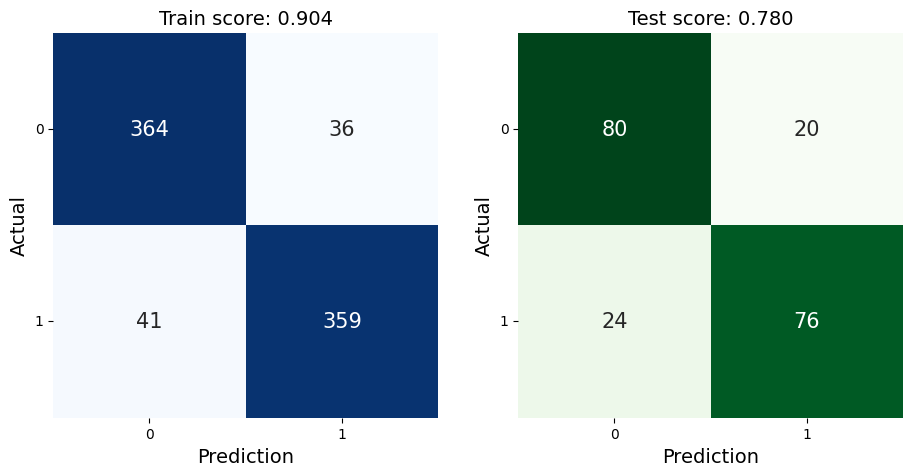

In [123]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

In [124]:
new_sentence = "the food and place are quite good, but access to this place is not good"

new_sentence_vector1 = norm_sent_vector(new_sentence, w2v, sw_english)
new_sentence_vector = new_sentence_vector1.reshape(1, -1)  # Reshape vector
prediction = model.predict(new_sentence_vector)
print("new sentence predictions:", prediction)


new sentence predictions: [1]
